In [35]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [36]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
def getGene(ana, name):
    id1 = ana.h.getBestID(ana.h.getIDs(name).keys())
    expr = ana.h.getExprData(id1)
    lval = [[] for i in ana.atypes]
    if expr is None:
        print("Not Found")
        return lval
    aval = ana.aval
    for i in ana.h.aRange():
        if aval[i] is None:
            continue
        lval[aval[i]] += [float(expr[i])]
    return lval

Herazo-Maya 2013 IPF I (n = 45)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV74
45 30 15 0 MACV74
[31]
Herazo-Maya 2013 IPF II (n = 94)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV75
75 32 43 0 MACV75
[33]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

Herazo-Maya 2013 IPF I (n = 45)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV74
45 30 15 0 MACV74
[31]
Herazo-Maya 2013 IPF II (n = 94)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV75
75 32 43 0 MACV75
[33]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

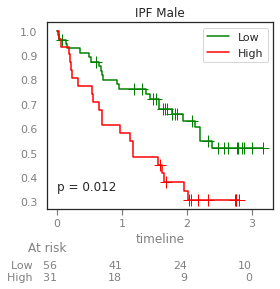

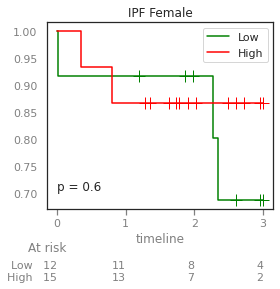

In [37]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/KM_IPF_svip.pdf"
pdf = getPDF(cfile)


def printTestSurvival(l1, wt1, ax = None, sex = None, pthr=None):
    ana = bone.MacAnalysis()
    ana.getSurvival("MACV74")
    gender = ana.h.getSurvName('c gender')
    ana.order = [i for i in ana.order if gender[i] == sex]
    ana.orderData(l1, wt1)
    time = ana.h.getSurvName('time')
    status = ana.h.getSurvName('status')
    time1 = [time[i] for i in ana.order]
    status1 = [status[i] for i in ana.order]
    thr = hu.getThrData(ana.f_ranks)
    #nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/52
    #nm =(np.mean(ana.f_ranks))
    #print ('hi',thr[1])
    fthr = thr[0]
    #fthr = thr[0] + (nm/4)    
    group1 = [1 if ana.f_ranks[i - ana.h.start] > fthr else 0  for i in ana.order]

    ana = bone.MacAnalysis()
    ana.getSurvival("MACV75")
    gender = ana.h.getSurvName('c gender')
    ana.order = [i for i in ana.order if gender[i] == sex]
    ana.orderData(l1, wt1)
    time = ana.h.getSurvName('time')
    status = ana.h.getSurvName('status')
    time2 = [time[i] for i in ana.order]
    status2 = [status[i] for i in ana.order]
    thr = hu.getThrData(ana.f_ranks)
    #nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/52
    #nm =(np.mean(ana.f_ranks))
    #print ('hi',thr[1])
    fthr = thr[0]
    #fthr = thr[0] + (nm/4)    
    group2 = [1 if ana.f_ranks[i - ana.h.start] > fthr else 0 for i in ana.order]


    df = pd.DataFrame()
    df['time'] = time1 + time2
    df['status'] = status1 + status2
    df['group'] = group1 + group2
    g1 = [i for i in df.index if df['group'][i] == 0]
    g2 = [i for i in df.index if df['group'][i] == 1]
    pG = [ ["Low", "green", g1], ["High", "red", g2]]
    time, status = hu.censor(df['time'], df['status'], 3)
    ax = hu.survival(time, status, pG, ax)
    return ax

#cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[3:62], l1[65:]]

#cfile = 'ipf/IPF signature_PMID_28942086.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:8], l1[10:]]

wt1, l1 = bone.getSViP()
sax = printTestSurvival(l1, wt1, None,  'Male')
sax.set_title('IPF Male')
pdf.savefig(transparent=True)

sax = printTestSurvival(l1, wt1, None,  'Female')
sax.set_title('IPF Female')
pdf.savefig(transparent=True)
closePDF(pdf)

Herazo-Maya 2013 IPF I (n = 45)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV74
45 30 15 0 MACV74
[7, 97]
Herazo-Maya 2013 IPF II (n = 94)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV75
75 32 43 0 MACV75
[7, 73]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

Herazo-Maya 2013 IPF I (n = 45)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV74
45 30 15 0 MACV74
[7, 97]
Herazo-Maya 2013 IPF II (n = 94)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV75
75 32 43 0 MACV75
[7, 73]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

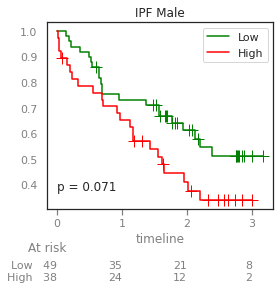

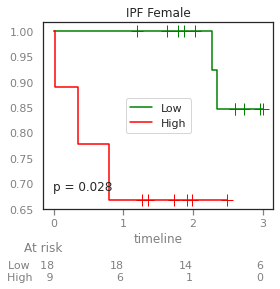

In [41]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/KM_IPF_svip.pdf"
pdf = getPDF(cfile)


def printTestSurvival(l1, wt1, ax = None, sex = None, pthr=None):
    ana = bone.MacAnalysis()
    ana.getSurvival("MACV74")
    gender = ana.h.getSurvName('c gender')
    ana.order = [i for i in ana.order if gender[i] == sex]
    ana.orderData(l1, wt1)
    time = ana.h.getSurvName('time')
    status = ana.h.getSurvName('status')
    time1 = [time[i] for i in ana.order]
    status1 = [status[i] for i in ana.order]
    thr = hu.getThrData(ana.f_ranks)
    #nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/52
    #nm =(np.mean(ana.f_ranks))
    #print ('hi',thr[1])
    fthr = thr[0]
    #fthr = thr[0] + (nm/4)    
    group1 = [1 if ana.f_ranks[i - ana.h.start] > fthr else 0  for i in ana.order]

    ana = bone.MacAnalysis()
    ana.getSurvival("MACV75")
    gender = ana.h.getSurvName('c gender')
    ana.order = [i for i in ana.order if gender[i] == sex]
    ana.orderData(l1, wt1)
    time = ana.h.getSurvName('time')
    status = ana.h.getSurvName('status')
    time2 = [time[i] for i in ana.order]
    status2 = [status[i] for i in ana.order]
    thr = hu.getThrData(ana.f_ranks)
    #nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/52
    #nm =(np.mean(ana.f_ranks))
    #print ('hi',thr[1])
    fthr = thr[0]
    #fthr = thr[0] + (nm/4)    
    group2 = [1 if ana.f_ranks[i - ana.h.start] > fthr else 0 for i in ana.order]


    df = pd.DataFrame()
    df['time'] = time1 + time2
    df['status'] = status1 + status2
    df['group'] = group1 + group2
    g1 = [i for i in df.index if df['group'][i] == 0]
    g2 = [i for i in df.index if df['group'][i] == 1]
    pG = [ ["Low", "green", g1], ["High", "red", g2]]
    time, status = hu.censor(df['time'], df['status'], 3)
    ax = hu.survival(time, status, pG, ax)
    return ax

#cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[3:62], l1[65:]]

cfile = 'ipf/IPF signature_PMID_28942086.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [1, -1], [l1[1:8], l1[10:]]

#wt1, l1 = bone.getSViP()
sax = printTestSurvival(l1, wt1, None,  'Male')
sax.set_title('IPF Male')
pdf.savefig(transparent=True)

sax = printTestSurvival(l1, wt1, None,  'Female')
sax.set_title('IPF Female')
pdf.savefig(transparent=True)
closePDF(pdf)

Herazo-Maya 2013 IPF I (n = 45)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV74
45 30 15 0 MACV74
[149, 15]
Herazo-Maya 2013 IPF II (n = 94)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV75
75 32 43 0 MACV75
[103, 13]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

Herazo-Maya 2013 IPF I (n = 45)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV74
45 30 15 0 MACV74
[149, 15]
Herazo-Maya 2013 IPF II (n = 94)
GSE28221 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV75
75 32 43 0 MACV75
[103, 13]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

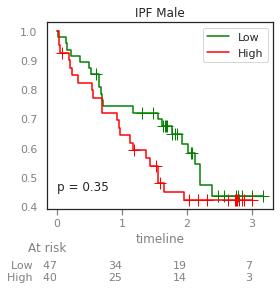

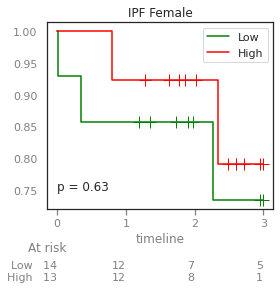

In [42]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/KM_IPF_svip.pdf"
pdf = getPDF(cfile)


def printTestSurvival(l1, wt1, ax = None, sex = None, pthr=None):
    ana = bone.MacAnalysis()
    ana.getSurvival("MACV74")
    gender = ana.h.getSurvName('c gender')
    ana.order = [i for i in ana.order if gender[i] == sex]
    ana.orderData(l1, wt1)
    time = ana.h.getSurvName('time')
    status = ana.h.getSurvName('status')
    time1 = [time[i] for i in ana.order]
    status1 = [status[i] for i in ana.order]
    thr = hu.getThrData(ana.f_ranks)
    #nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/52
    #nm =(np.mean(ana.f_ranks))
    #print ('hi',thr[1])
    fthr = thr[0]
    #fthr = thr[0] + (nm/4)    
    group1 = [1 if ana.f_ranks[i - ana.h.start] > fthr else 0  for i in ana.order]

    ana = bone.MacAnalysis()
    ana.getSurvival("MACV75")
    gender = ana.h.getSurvName('c gender')
    ana.order = [i for i in ana.order if gender[i] == sex]
    ana.orderData(l1, wt1)
    time = ana.h.getSurvName('time')
    status = ana.h.getSurvName('status')
    time2 = [time[i] for i in ana.order]
    status2 = [status[i] for i in ana.order]
    thr = hu.getThrData(ana.f_ranks)
    #nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/52
    #nm =(np.mean(ana.f_ranks))
    #print ('hi',thr[1])
    fthr = thr[0]
    #fthr = thr[0] + (nm/4)    
    group2 = [1 if ana.f_ranks[i - ana.h.start] > fthr else 0 for i in ana.order]


    df = pd.DataFrame()
    df['time'] = time1 + time2
    df['status'] = status1 + status2
    df['group'] = group1 + group2
    g1 = [i for i in df.index if df['group'][i] == 0]
    g2 = [i for i in df.index if df['group'][i] == 1]
    pG = [ ["Low", "green", g1], ["High", "red", g2]]
    time, status = hu.censor(df['time'], df['status'], 3)
    ax = hu.survival(time, status, pG, ax)
    return ax

cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [1, -1], [l1[3:62], l1[65:]]

#cfile = 'ipf/IPF signature_PMID_28942086.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:8], l1[10:]]

#wt1, l1 = bone.getSViP()
sax = printTestSurvival(l1, wt1, None,  'Male')
sax.set_title('IPF Male')
pdf.savefig(transparent=True)

sax = printTestSurvival(l1, wt1, None,  'Female')
sax.set_title('IPF Female')
pdf.savefig(transparent=True)
closePDF(pdf)

Jaitovich 2020 CoV2 HFD-45 (n = 126)
GSE157103 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV274
126 26 100 0 COV274
[57, 8]
49 15


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

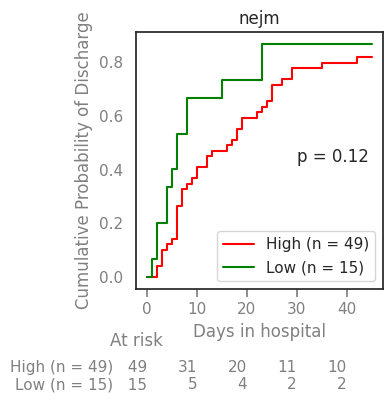

In [38]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/KM_cov_nejm.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
ana.getJaitovich2020()
df = pd.DataFrame()
time = ana.h.getSurvName('time')
ahash = {1:None, 'time':None}
df['time'] = [None if k in ahash else k for k in time]
df['status'] = ana.h.getSurvName('status')
atype = ana.h.getSurvName('c disease state')
ahash = {'COVID-19':1, 'non-COVID-19':0}
df['state'] = [ahash[k] if k in ahash else None for k in atype]
atype = ana.h.getSurvName('c age (years)')
ahash = {6:None, 'c age (years)':None, ':':None, '>89':'89'}
df['age'] = [ahash[k] if k in ahash else k for k in atype]

#wt1, l1 = bone.getSViP()


cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [1, -1], [l1[3:62], l1[65:]]


#cfile = 'ipf/IPF signature_PMID_28942086.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:8], l1[10:]]

ana.orderData(l1, wt1)
thr = hu.getThrData(ana.f_ranks)
#nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/16
fthr = thr[0]
#fthr = thr[0] + .248 * nm
#print (fthr, pd.Series(ana.f_ranks).describe())
cov = set([i for i in ana.order if df.loc[i, 'state'] == 1 and
           df.loc[i, 'age'] is not None and int(df.loc[i, 'age']) < 70])
g1 = [i for i in cov if ana.f_ranks[i - ana.h.start] > fthr]
g2 = [i for i in cov if ana.f_ranks[i - ana.h.start] <= fthr]
pG = [ ["High" , "red", g1], ["Low", "green", g2]]
for g in pG:
    g[0] += " (n = " +  str(len(g[2])) + ")"
print(len(g1), len(g2))
time = [None if k == None else 45 - int(k) for k in df['time']]
status = [df['status'][i] if df['time'][i] != '0' else '0' for i in range(len(time))]
ax = hu.survivalCDF(time, status, pG)
ax.set_xlabel('Days in hospital')
ax.set_ylabel('Cumulative Probability of Discharge')
ax.set_title('nejm')
pdf.savefig(transparent=True)
closePDF(pdf)

Jaitovich 2020 CoV2 HFD-45 (n = 126)
GSE157103 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV274
126 26 100 0 COV274
[7, 43]
25 39


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

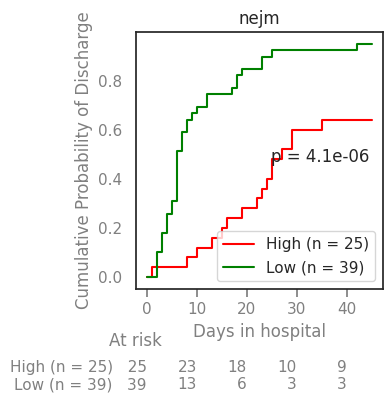

In [39]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/KM_cov_nejm.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
ana.getJaitovich2020()
df = pd.DataFrame()
time = ana.h.getSurvName('time')
ahash = {1:None, 'time':None}
df['time'] = [None if k in ahash else k for k in time]
df['status'] = ana.h.getSurvName('status')
atype = ana.h.getSurvName('c disease state')
ahash = {'COVID-19':1, 'non-COVID-19':0}
df['state'] = [ahash[k] if k in ahash else None for k in atype]
atype = ana.h.getSurvName('c age (years)')
ahash = {6:None, 'c age (years)':None, ':':None, '>89':'89'}
df['age'] = [ahash[k] if k in ahash else k for k in atype]

#wt1, l1 = bone.getSViP()


#cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[3:62], l1[65:]]


cfile = 'ipf/IPF signature_PMID_28942086.txt'
l1 = bone.getEntries(cfile, 0)
wt1, l1 = [1, -1], [l1[1:8], l1[10:]]

ana.orderData(l1, wt1)
thr = hu.getThrData(ana.f_ranks)
#nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/16
fthr = thr[0]
#fthr = thr[0] + .248 * nm
#print (fthr, pd.Series(ana.f_ranks).describe())
cov = set([i for i in ana.order if df.loc[i, 'state'] == 1 and
           df.loc[i, 'age'] is not None and int(df.loc[i, 'age']) < 70])
g1 = [i for i in cov if ana.f_ranks[i - ana.h.start] > fthr]
g2 = [i for i in cov if ana.f_ranks[i - ana.h.start] <= fthr]
pG = [ ["High" , "red", g1], ["Low", "green", g2]]
for g in pG:
    g[0] += " (n = " +  str(len(g[2])) + ")"
print(len(g1), len(g2))
time = [None if k == None else 45 - int(k) for k in df['time']]
status = [df['status'][i] if df['time'][i] != '0' else '0' for i in range(len(time))]
ax = hu.survivalCDF(time, status, pG)
ax.set_xlabel('Days in hospital')
ax.set_ylabel('Cumulative Probability of Discharge')
ax.set_title('nejm')
pdf.savefig(transparent=True)
closePDF(pdf)

Jaitovich 2020 CoV2 HFD-45 (n = 126)
GSE157103 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV274
126 26 100 0 COV274
[14]
48 16


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

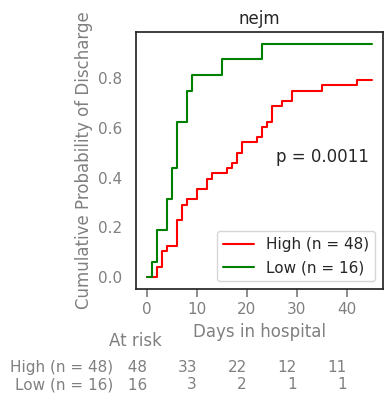

In [40]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/KM_cov_nejm.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
ana.getJaitovich2020()
df = pd.DataFrame()
time = ana.h.getSurvName('time')
ahash = {1:None, 'time':None}
df['time'] = [None if k in ahash else k for k in time]
df['status'] = ana.h.getSurvName('status')
atype = ana.h.getSurvName('c disease state')
ahash = {'COVID-19':1, 'non-COVID-19':0}
df['state'] = [ahash[k] if k in ahash else None for k in atype]
atype = ana.h.getSurvName('c age (years)')
ahash = {6:None, 'c age (years)':None, ':':None, '>89':'89'}
df['age'] = [ahash[k] if k in ahash else k for k in atype]

wt1, l1 = bone.getSViP()


#cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[3:62], l1[65:]]


#cfile = 'ipf/IPF signature_PMID_28942086.txt'
#l1 = bone.getEntries(cfile, 0)
#wt1, l1 = [1, -1], [l1[1:8], l1[10:]]

ana.orderData(l1, wt1)
thr = hu.getThrData(ana.f_ranks)
#nm = (np.max(ana.f_ranks) - np.min(ana.f_ranks))/16
fthr = thr[0]
#fthr = thr[0] + .248 * nm
#print (fthr, pd.Series(ana.f_ranks).describe())
cov = set([i for i in ana.order if df.loc[i, 'state'] == 1 and
           df.loc[i, 'age'] is not None and int(df.loc[i, 'age']) < 70])
g1 = [i for i in cov if ana.f_ranks[i - ana.h.start] > fthr]
g2 = [i for i in cov if ana.f_ranks[i - ana.h.start] <= fthr]
pG = [ ["High" , "red", g1], ["Low", "green", g2]]
for g in pG:
    g[0] += " (n = " +  str(len(g[2])) + ")"
print(len(g1), len(g2))
time = [None if k == None else 45 - int(k) for k in df['time']]
status = [df['status'][i] if df['time'][i] != '0' else '0' for i in range(len(time))]
ax = hu.survivalCDF(time, status, pG)
ax.set_xlabel('Days in hospital')
ax.set_ylabel('Cumulative Probability of Discharge')
ax.set_title('nejm')
pdf.savefig(transparent=True)
closePDF(pdf)